In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21743 files belonging to 17 classes.


2025-04-09 12:21:25.105267: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-09 12:21:25.105294: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-04-09 12:21:25.105298: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-04-09 12:21:25.105316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-09 12:21:25.105328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5437 files belonging to 17 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    37,633,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │        25,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,371,241 (161.63 MB)

 Trainable params: 42,371,241 (161.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2025-04-09 12:22:29.166920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-09 12:22:29.172416: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


680/680 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5964 - loss: 1.2087

2025-04-09 12:24:22.428804: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 175ms/step - accuracy: 0.5966 - loss: 1.2081 - val_accuracy: 0.8718 - val_loss: 0.3508
Epoch 2/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 178ms/step - accuracy: 0.8914 - loss: 0.3048 - val_accuracy: 0.9272 - val_loss: 0.1991
Epoch 3/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 122s 179ms/step - accuracy: 0.9365 - loss: 0.1891 - val_accuracy: 0.9601 - val_loss: 0.1178
Epoch 4/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 178ms/step - accuracy: 0.9567 - loss: 0.1214 - val_accuracy: 0.9632 - val_loss: 0.1167
Epoch 5/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 179ms/step - accuracy: 0.9665 - loss: 0.0921 - val_accuracy: 0.9812 - val_loss: 0.0547
Epoch 6/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 177ms/step - accuracy: 0.9766 - loss: 0.0689 - val_accuracy: 0.9663 - val_loss: 0.1094
Epoch 7/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 178ms/step - accuracy: 0.9738 - loss: 0.0733 - val_accuracy: 0.9676 - val_loss: 0.0970
Epoch 8/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 121s 178ms/step - accuracy: 0.9790 - loss: 0.06

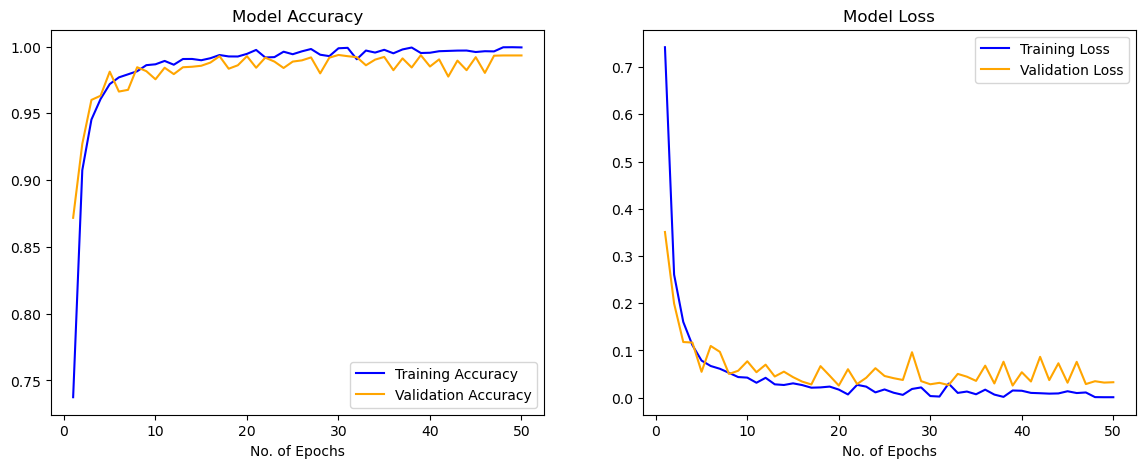

Found 5437 files belonging to 17 classes.
  31/5437 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step   

2025-04-09 14:03:59.198985: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


5437/5437 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


2025-04-09 14:04:19.549923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


True categories:
[ 0  0  0 ... 16 16 16]
Predicted categories:
[ 0  0  0 ... 16 16 16]
                               precision    recall  f1-score   support

           Citrus__Black Spot       0.99      0.98      0.98       320
               Citrus__Canker       0.98      0.99      0.98       320
              Citrus__Healthy       1.00      1.00      1.00       320
               Guava__Healthy       1.00      0.99      1.00       320
           Guava__Phytopthora       0.99      0.99      0.99       320
                  Guava__Scab       0.99      0.99      0.99       320
       Guava__Styler_and_Root       0.99      1.00      1.00       320
            Mango__Alternaria       0.99      1.00      1.00       320
           Mango__Anthracnose       1.00      0.99      1.00       317
       Mango__Black Mould Rot       1.00      1.00      1.00       320
               Mango__Healthy       0.99      1.00      1.00       320
          Mango__Stem end Rot       1.00      1.00      1.00

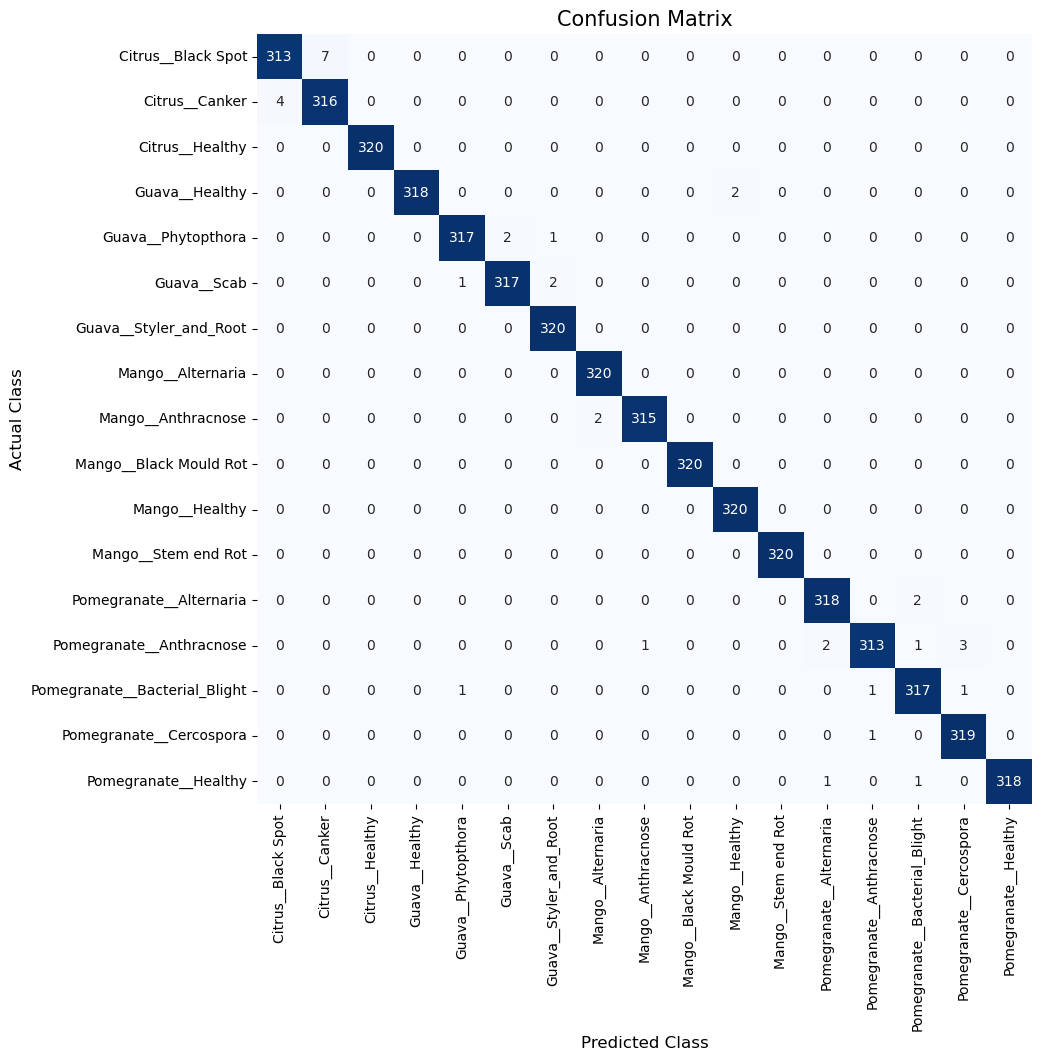

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json

# Define the input shape for 64x64 image size
input_shape = (224, 224, 3)

# Create a Sequential model
cnn = tf.keras.models.Sequential()

# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))  # Use 'same' padding here
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout and Flatten layers
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

# Dense layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer
cnn.add(tf.keras.layers.Dense(units=17, activation='softmax'))

# Compile the model with Adam optimizer
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Display model summary
cnn.summary()

# Training the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=50)

# Training set accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

# Validation set accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('custom_CNN_Fruit_Disease_Recognition_model.keras')

# Save training history as JSON
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

# Print keys of the training history dictionary
print(training_history.history.keys())

# Plot training and validation accuracy
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Model Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_history.history['loss'], color='blue', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='orange', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Model Loss')
plt.legend()

plt.show()

# Load validation set class names
class_name = validation_set.class_names

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),  # Adjusted to match the input shape
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Predict classes on test set
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1).numpy()

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1).numpy()

# Display true and predicted categories
print('True categories:')
print(Y_true)
print('Predicted categories:')
print(predicted_categories)

# Generate confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Print precision, recall, f1-score
print(classification_report(Y_true, predicted_categories, target_names=class_name))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_name, yticklabels=class_name)

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

# Save confusion matrix plot as PNG file
conf_matrix_plot_path = "./image/confusion_matrix_plot.png"
plt.savefig(conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()


                               precision    recall  f1-score   support

           Citrus__Black Spot       0.99      0.98      0.98       320
               Citrus__Canker       0.98      0.99      0.98       320
              Citrus__Healthy       1.00      1.00      1.00       320
               Guava__Healthy       1.00      0.99      1.00       320
           Guava__Phytopthora       0.99      0.99      0.99       320
                  Guava__Scab       0.99      0.99      0.99       320
       Guava__Styler_and_Root       0.99      1.00      1.00       320
            Mango__Alternaria       0.99      1.00      1.00       320
           Mango__Anthracnose       1.00      0.99      1.00       317
       Mango__Black Mould Rot       1.00      1.00      1.00       320
               Mango__Healthy       0.99      1.00      1.00       320
          Mango__Stem end Rot       1.00      1.00      1.00       320
      Pomegranate__Alternaria       0.99      0.99      0.99       320
     

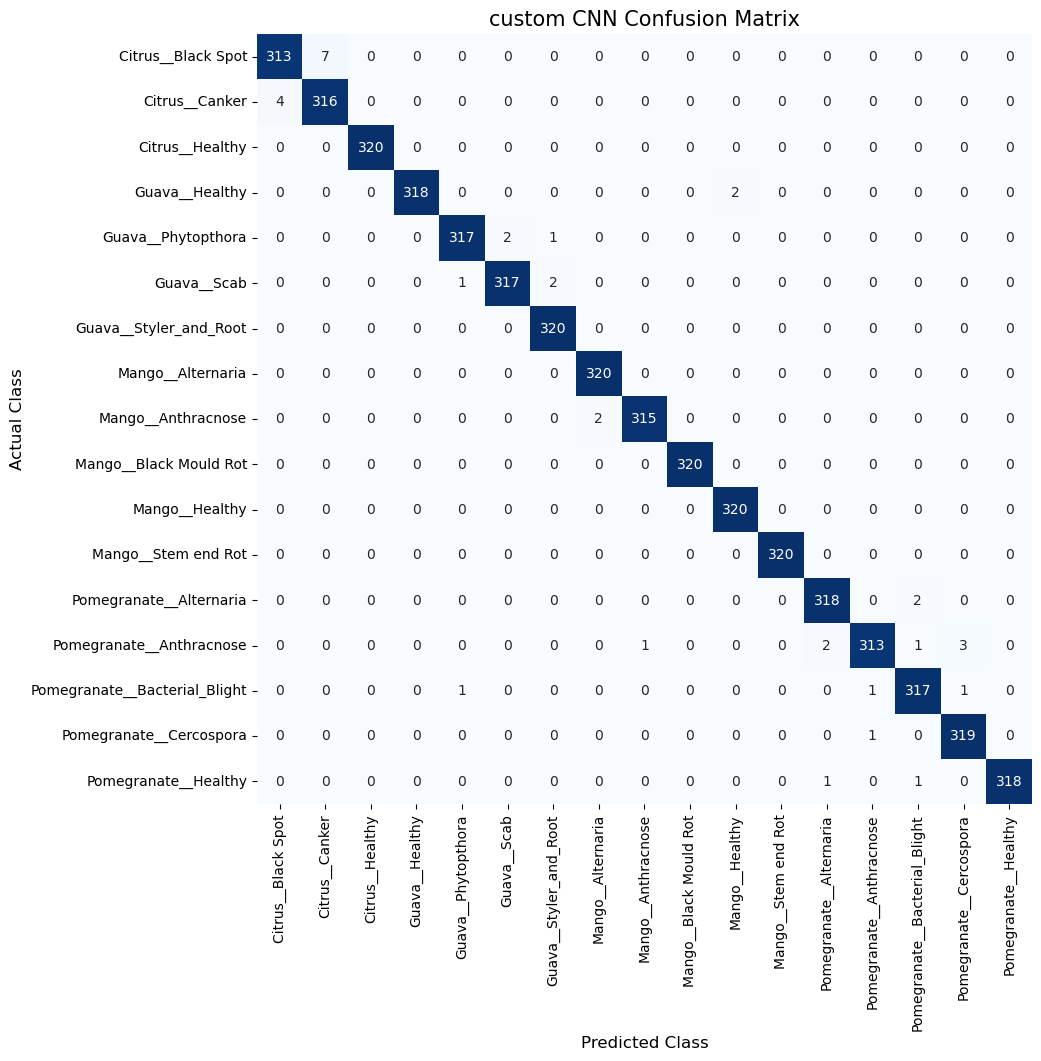

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Print precision, recall, f1-score
print(classification_report(Y_true, predicted_categories, target_names=class_name))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_name, yticklabels=class_name)

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.title('custom CNN Confusion Matrix', fontsize=15)

# Save confusion matrix plot as PNG file
conf_matrix_plot_path = "./image/confusion_matrix_plot.png"
plt.savefig(conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()


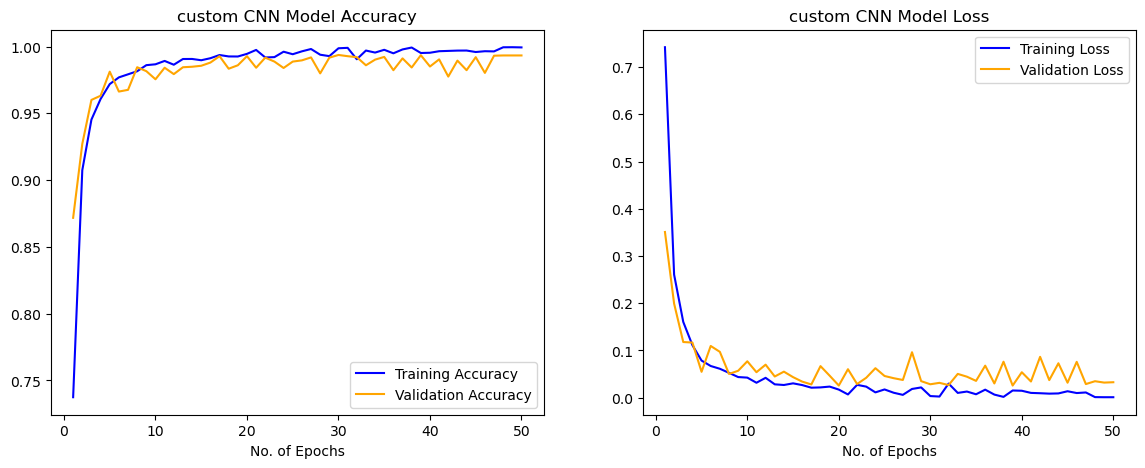

In [ ]:
# Plot training and validation accuracy
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('custom CNN Model Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_history.history['loss'], color='blue', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='orange', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('custom CNN Model Loss')
plt.legend()

plt.show()